###### **Repository :** [https://github.com/alaoui-assia/HAH913E-Physical-activity-00-AlaouiAssia](https://github.com/alaoui-assia/HAH913E-Physical-activity-00-AlaouiAssia)  
###### **Name :** Assia Alaoui


#### Some definitions
###### I asked Copilot to explain the following concepts in simple terms.

###### Acceleration: the rate of change of an object’s velocity as a function of time.  

###### Accelerometry: the technique of measuring the acceleration of a body in space using a sensor (accelerometer).  

###### ENMO (Euclidean Norm Minus One): an indicator of physical activity calculated as the norm √(x²+y²+z²) of accelerations, minus 1 g (gravity), then truncated at 0 to keep only the net movement.  

###### Epoch: a fixed time window (e.g., 10 s, 30 s, 60 s) in which all measurements are grouped and summarized into a single value. 

###### On commence par la lecture des données.  On importe le fichier `0_z.csv` qui contient les colonnes de temps (t, en secondes) et les trois composantes d’accélération (x, y, z en g).

In [1]:
import pandas as pd

###### The file is read while ignoring the first comment line: accelerometer data in g.  

In [2]:
df = pd.read_csv("0_z.csv", comment="#")

###### We display the first 5 rows and the column names to verify that the file has been read correctly and that the columns have the expected structure. 

In [3]:
print(df.head())
print(df.columns)

      t       x       y       z
0  0.00 -0.0938 -0.0156  0.9531
1  0.02 -0.0938 -0.0156  0.9531
2  0.04 -0.0938 -0.0156  0.9531
3  0.06 -0.0938 -0.0156  0.9531
4  0.08 -0.0938 -0.0156  0.9531
Index(['t', 'x', 'y', 'z'], dtype='object')


###### We proceed with the calculation of ENMO and then check the first 5 rows. I asked Copilot to provide the code to compute ENMO. 


In [4]:
import numpy as np
r = np.sqrt(df["x"]**2 + df["y"]**2 + df["z"]**2)
df["enmo"] = np.maximum(0, r - 1)
print(df.head())

      t       x       y       z  enmo
0  0.00 -0.0938 -0.0156  0.9531   0.0
1  0.02 -0.0938 -0.0156  0.9531   0.0
2  0.04 -0.0938 -0.0156  0.9531   0.0
3  0.06 -0.0938 -0.0156  0.9531   0.0
4  0.08 -0.0938 -0.0156  0.9531   0.0


###### We group the data into fixed windows (epochs) of 10 s, 30 s, and 60 s. I asked Copilot to re-explain the concept of epochs with an example, and then to provide the simplest possible code to implement it. 

###### A time index is required to group the data into fixed windows (epochs).  
###### We convert `t` (in seconds) into a datetime format.  


In [5]:
df["time"] = pd.to_datetime(df["t"], unit="s")

###### We set this column as the **index** of the dataframe.  

In [6]:
df = df.set_index("time")

###### We calculate the mean ENMO every 10, 30, and 60 seconds using the pandas resample() function. 

In [7]:
enmo_10s = df["enmo"].resample("10s").mean()
enmo_30s = df["enmo"].resample("30s").mean()
enmo_60s = df["enmo"].resample("60s").mean()

###### We check the first 5 rows.  

In [8]:
print(enmo_10s.head())
print(enmo_30s.head())
print(enmo_60s.head())

time
1970-01-01 00:00:00    0.00004
1970-01-01 00:00:10    0.00000
1970-01-01 00:00:20    0.00000
1970-01-01 00:00:30    0.00000
1970-01-01 00:00:40    0.00000
Freq: 10s, Name: enmo, dtype: float64
time
1970-01-01 00:00:00    0.000013
1970-01-01 00:00:30    0.000117
1970-01-01 00:01:00    0.000000
1970-01-01 00:01:30    0.000000
1970-01-01 00:02:00    0.000000
Freq: 30s, Name: enmo, dtype: float64
time
1970-01-01 00:00:00    0.000065
1970-01-01 00:01:00    0.000000
1970-01-01 00:02:00    0.000133
1970-01-01 00:03:00    0.000093
1970-01-01 00:04:00    0.358817
Freq: 60s, Name: enmo, dtype: float64


###### We want to visualize: mean ENMO vs integrated ENMO

###### For each epoch (10 s, 30 s, 60 s), we produce two complementary views:

###### - **Mean ENMO per epoch**  
######   Calculation: the average ENMO within the window.  
######   **Why?** It smooths the signal and provides the **average intensity** of activity on a standardized time step. Useful for comparing periods and observing overall trends.

###### - **Integrated ENMO per epoch**  
######   Calculation: the sum of `ENMO × Δt` over the window (→ g·min).  
######   **Why?** It measures the **total amount of activity** accumulated within the epoch (area under the curve). Useful to quantify cumulative “effort,” even when instantaneous intensity varies.

###### We save the figures under the required names:  
###### - `enmo_plot_10.0s.png`  
###### - `enmo_plot_30.0s.png`  
###### - `enmo_plot_60.0s.png`

###### I knew how to plot mean ENMO as time-series curves, but not integrated ENMO as bars. I asked Copilot for help with the code.

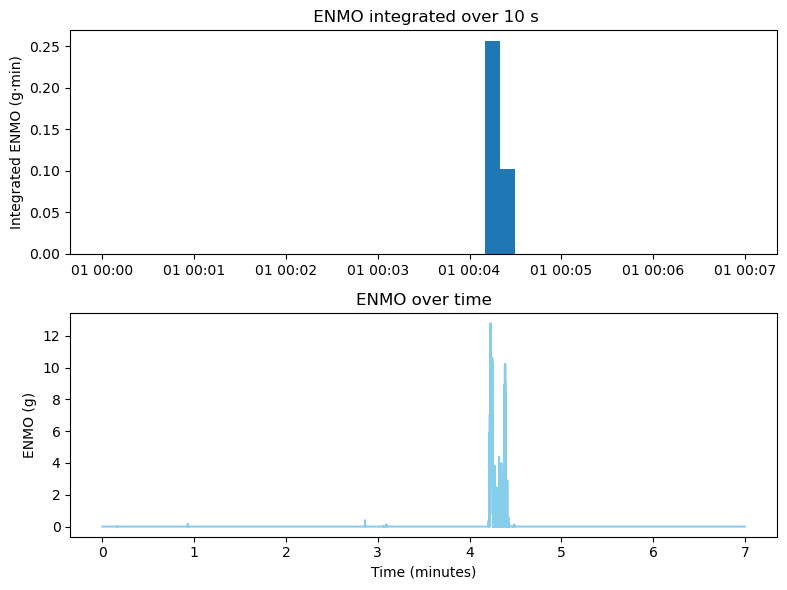

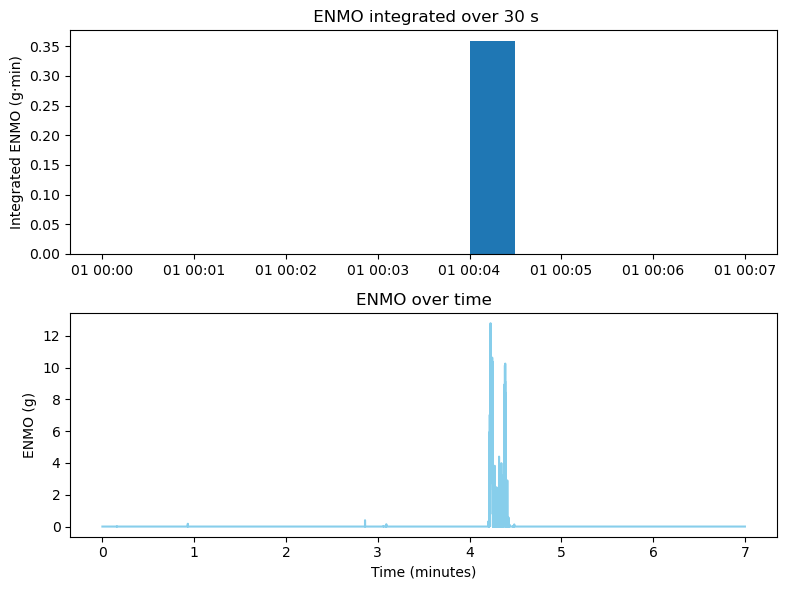

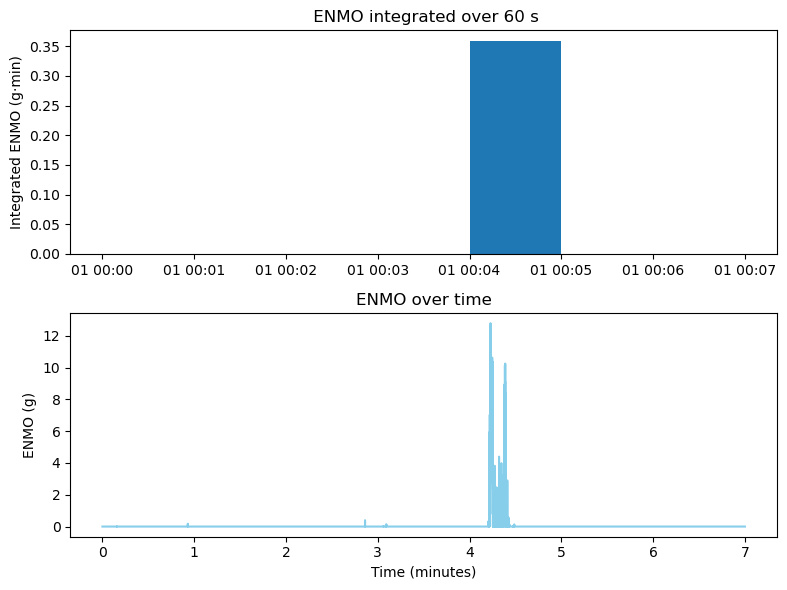

In [9]:
import matplotlib.pyplot as plt

# Loop over the 3 epoch lengths
for ep in [10, 30, 60]:
    # Calculation of the time step between two measurements (in seconds)
    dt = df["t"].diff().fillna(0.0)

    # Integrated ENMO = sum of ENMO * Δt within each epoch of ep seconds (converted to g·min) 
    enmo_integrated = (df["enmo"] * dt).resample(f"{ep}s").sum() / 60.0

   # Instantaneous ENMO (in minutes for the time axis)
    minutes = (df.index - df.index[0]).total_seconds() / 60.0

    # Creation of the two plots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,6))

    width_days = ep / 86400.0   # Width of the bars in days
    ax1.bar(enmo_integrated.index, enmo_integrated.values, width=width_days, align="edge")
    ax1.set_title(f" ENMO integrated over {ep} s")
    ax1.set_ylabel("Integrated ENMO (g·min)")

    ax2.plot(minutes, df["enmo"], color="skyblue")
    ax2.set_title("ENMO over time")
    ax2.set_xlabel("Time (minutes)")
    ax2.set_ylabel("ENMO (g)")

    plt.tight_layout()
    plt.savefig(f"enmo_plot_{ep}.png", dpi=150)
    plt.show()


###### Interpretation  
###### - The ENMO peak always appears around 4 minutes, which corresponds to the moment of movement.  
###### - With a short epoch (10 s), the activity is split into two integrated bars.  
###### - With longer epochs (30 s, 60 s), everything is grouped into a single, higher bar.  
###### - Mean ENMO indicates the intensity of the movement, while integrated ENMO reflects the total amount of activity (intensity × duration). 

###### I asked Copilot a few questions:  

###### Why do the values of mean ENMO look similar across the different curves (10 s, 30 s, 60 s)? Shouldn’t there be a difference since the number of data points varies?  
###### Mean ENMO corresponds to the average within each window. Even if the window size changes, the average movement intensity remains similar because the movement itself is the same. The main difference is seen in the smoothing (peaks more or less attenuated).  

###### Why is the value of integrated ENMO about 0.25 for 10 s and 0.35 for 30 s and 60 s? Shouldn’t it increase more, as in the professor’s example?  
###### Integrated ENMO sums ENMO × duration. With a longer epoch, you integrate over a larger period, so the value increases. If the increase is smaller than in the professor’s example, it is probably due to your dataset (shorter movement, lower intensity) or to the way the activity is distributed.  

###### Why do I have two bars for 10 s, but only one for 30 s and 60 s?  
###### Because the movement lasted slightly longer than 10 seconds, so it is split across two consecutive 10 s windows. With 30 s or 60 s epochs, everything is grouped into a single window → therefore a single bar.  

###### What are the consequences of choosing longer epochs (30 s, 60 s)?  
###### The signal becomes smoother and more stable, which makes it easier to analyze general trends, but precision is lost and short or intense movements may be attenuated or hidden. 